In [102]:
 !pip install newsapi-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Loading Article from News API

In [173]:
from newsapi import NewsApiClient

In [174]:
#Using api key to authorize and access the client
newsapi = NewsApiClient(api_key='a6bfb83c569643d1b136b5bf7d447d03')

Search for a particular topic


In [177]:
search = input('Input the search topic for article\n')
urlList = []
for article,idx in zip(newsapi.get_everything(q=search)['articles'],range(len(newsapi.get_everything(q=search)['articles']))):
  urlList.append(article['url'])
  print(f'Article {idx}\n','Title:',article['title'],'\n','Author:',article['author'],'\n','Description:',article['description'],'\n','URL:',article['url'],'\n\n\n')

Input the search topic for article
accidents
Article 0
 Title: Nearly 1.4 Million of These Power Tools Are Part of a Massive Recall 
 Author: Elizabeth Yuko 
 Description: When using power tools, we go in with the understanding that we’ll be working with a potentially dangerous piece of equipment, and (ideally) will take the proper safety precautions. We also know that even if someone has decades of experience using them, user … 
 URL: https://lifehacker.com/nearly-1-4-million-of-these-power-tools-are-part-of-a-m-1849401340 



Article 1
 Title: Best Samsung Galaxy A53 screen protectors 2022 
 Author: tips@androidcentral.com (Nadine Dornieden) 
 Description: We know you love your phone, but sometimes, accidents happen. Keep your phone looking like new with these screen protectors 
 URL: https://www.androidcentral.com/accessories/best-samsung-galaxy-a53-screen-protectors-2022 



Article 2
 Title: BMW recalls 83 iX and i4 EVs over battery fire concerns 
 Author: Igor Bonifacic 
 Descrip

In [178]:
print(urlList)

['https://lifehacker.com/nearly-1-4-million-of-these-power-tools-are-part-of-a-m-1849401340', 'https://www.androidcentral.com/accessories/best-samsung-galaxy-a53-screen-protectors-2022', 'https://www.engadget.com/bmw-recalls-i4-ix-evs-battery-fire-162448541.html', 'https://www.reuters.com/world/europe/accidents-can-happen-european-nuclear-plants-too-russian-ex-president-says-2022-08-12/', 'https://www.engadget.com/playstation-vr2-user-experience-preview-140248545.html', 'https://www.theverge.com/2022/8/1/23287053/bmw-i4-ix-recall-battery-fire-ev', 'https://www.businessinsider.com/jet-mishaps-show-difficulty-of-aircraft-carrier-flight-operations-2022-8', 'https://www.reuters.com/world/us/biden-nominate-former-florida-mayor-serve-us-safety-board-official-2022-08-03/', 'https://www.nytimes.com/2022/07/31/arts/design/jose-parla-detroit-artist-stroke-covid.html', 'https://abcnews.go.com/Politics/bill-require-colleges-publicly-report-accidents-result-harm/story?id=86885699', 'https://www.eng

In [179]:
urlList[1]

'https://www.androidcentral.com/accessories/best-samsung-galaxy-a53-screen-protectors-2022'

**Installing** **newspaper3k**

In [180]:
!pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Fetching Article**

In [181]:
from newspaper import Article
# https://github.com/codelucas/newspaper/blob/master/docs/user_guide/quickstart.rst

In [182]:
url_fetching = urlList[3]

In [183]:
url_fetching

'https://www.reuters.com/world/europe/accidents-can-happen-european-nuclear-plants-too-russian-ex-president-says-2022-08-12/'

In [184]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [185]:
article_fetched = Article(url_fetching)
article_fetched.download()
article_fetched.parse()
#article_fetched.nlp()

In [186]:
article_fetched.text

'LONDON, Aug 12 (Reuters) - Russian ex-president Dmitry Medvedev issued a veiled threat on Friday to Ukraine\'s Western allies who have accused Russia of creating the risk of a nuclear catastrophe by stationing forces around the Ukrainian Zaporizhzhia power station.\n\nUkraine has accused Russia of firing at Ukrainian towns from the site in the knowledge that Ukrainian forces could not risk returning fire. It says Moscow has shelled the area itself while blaming Ukraine.\n\nRussia says it is Ukraine that has shelled the plant.\n\nRegister now for FREE unlimited access to Reuters.com Register\n\n"They [Kyiv and its allies] say it\'s Russia. That\'s obviously 100% nonsense, even for the stupid Russophobic public," Medvedev, now deputy chairman of Russia\'s Security Council, wrote on his Telegram channel.\n\n"They say it happens purely by chance, like \'We didn\'t mean to\'," he added. "What can I say? Let\'s not forget that the European Union also has nuclear power plants. And accidents 

In [187]:
#cleaning text
clean_text= article_fetched.text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")

clean_text= ''.join([c for c in clean_text if c != "'"])

**Text summarization**

In [188]:
!pip install -U spacy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [189]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

In [190]:
nlp = spacy.load('en_core_web_sm')
def summarize(text, per):
    doc= nlp(text)
    tokens=[token.text for token in doc]
    word_frequencies={}
    for word in doc:
        if ((word.text.lower() not in list(STOP_WORDS)) and (word.text.lower() not in punctuation)):
          if word.text not in word_frequencies.keys():
            word_frequencies[word.text] = 1
          else:
            word_frequencies[word.text] += 1
    max_frequency=max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word]=word_frequencies[word]/max_frequency
    sentence_tokens= [sent for sent in doc.sents]
    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():                            
                    sentence_scores[sent]=word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent]+=word_frequencies[word.text.lower()]
    select_length=int(len(sentence_tokens)*per)
    summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
    final_summary=[word.text for word in summary]
    summary=''.join(final_summary)
    return summary

In [191]:
summary = summarize(clean_text, 0.2)

In [192]:
summary

'read more  But senior Russian lawmaker Leonid Slutsky, chair of the lower houses foreign affairs committee, said the idea of returning the plant to the control of Ukrainians was "a "mockery from the point of view of ensuring safety".  The U.N.s International Atomic Energy Agency has said the shelling of Zaporizhzhia, Europes biggest nuclear power station, could cause a nuclear disaster, but has been unable to arrange the conditions for an inspection.  Russian-appointed officials said Ukraine had shelled the plant twice, disrupting a shift change, Russias state-owned TASS news agency said.  '

**Comparison of summary and original text by length**

In [193]:
len(clean_text)

2337

In [194]:
len(summarize(clean_text, 0.2))

597

Word Cloud

In [195]:
#Creating the tokenizer
from nltk.tokenize import word_tokenize
#Tokenizing the text
tokens = word_tokenize(clean_text)

In [196]:
import re
# import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [197]:
# Looping through the tokens and make them lower case and removed stopwords and non alpha numeric keywords
words = []
for word in tokens:
    if (word.lower() not in stopwords and len(re.sub(r'[^A-Za-z0-9]+', ' ', word))>1):
        words.append(word.lower())

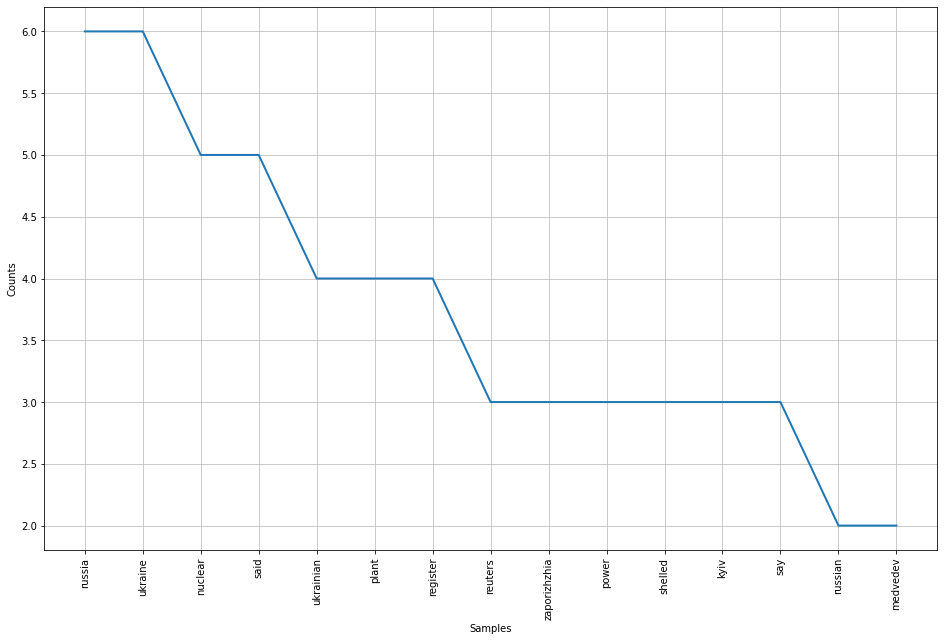

In [198]:
import matplotlib.pyplot as plt
freq_dist = nltk.FreqDist(words)
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(15)

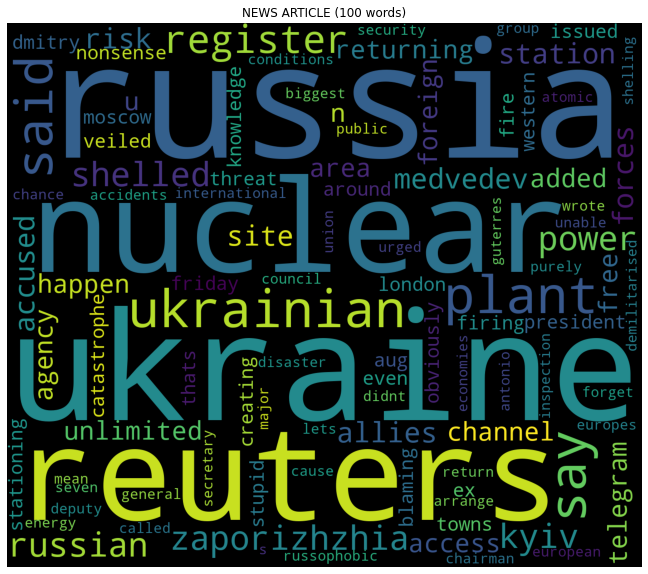

In [199]:
#converting into string
res=' '.join([i for i in words if not i.isdigit()])
from wordcloud import WordCloud

plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

**Sentiment Analysis**

In [200]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Sentiment Analysis Using TextBlob**

In [201]:
#Sentiment Analysis

from urllib.request import urlopen,Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [202]:
# nlp = spacy.load('en_core_web_sm')
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [203]:
sentence


['LONDON, Aug 12 (Reuters) - Russian ex-president Dmitry Medvedev issued a veiled threat on Friday to Ukraines Western allies who have accused Russia of creating the risk of a nuclear catastrophe by stationing forces around the Ukrainian Zaporizhzhia power station.',
 'Ukraine has accused Russia of firing at Ukrainian towns from the site in the knowledge that Ukrainian forces could not risk returning fire.',
 'It says Moscow has shelled the area itself while blaming Ukraine.',
 'Russia says it is Ukraine that has shelled the plant.',
 'Register now for FREE unlimited access to Reuters.com Register  "They [Kyiv and its allies] say its Russia.',
 'Thats obviously 100% nonsense, even for the stupid Russophobic public," Medvedev, now deputy chairman of Russias Security Council, wrote on his Telegram channel.',
 '"They say it happens purely by chance, like We didnt mean to," he added.',
 '"What can I say?',
 'Lets not forget that the European Union also has nuclear power plants.',
 'And acc

In [204]:
print(len(sentence))


18


In [205]:
print(sentence[1])


Ukraine has accused Russia of firing at Ukrainian towns from the site in the knowledge that Ukrainian forces could not risk returning fire.


In [206]:
!pip install pattern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [207]:
from textblob import TextBlob
#from pattern.en import sentiment

In [208]:
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [238]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
df=df_textblob


In [239]:
df_textblob.head(10)


,Sentence,Polarity,Subjectivity
0,"LONDON, Aug 12 (Reuters) - Russian ex-presiden...",0.000000,0.000000
1,Ukraine has accused Russia of firing at Ukrain...,0.000000,0.000000
2,It says Moscow has shelled the area itself whi...,0.000000,0.000000
3,Russia says it is Ukraine that has shelled the...,0.000000,0.000000
4,Register now for FREE unlimited access to Reut...,0.400000,0.800000
5,"Thats obviously 100% nonsense, even for the st...",-0.266667,0.522222
6,"""They say it happens purely by chance, like We...",-0.049107,0.593750
7,"""What can I say?",0.000000,0.000000
8,Lets not forget that the European Union also h...,0.000000,0.000000
9,"And accidents can happen there, too.""",0.000000,0.000000


In [240]:
sentiment = []
for x in df_textblob["Polarity"].values:
  if (x>0):
    sentiment.append("Positive")
  elif (x<0):
    sentiment.append("Negative")
  else:
    sentiment.append("Neutral")

    #df_textblob[df_textblob['Sentiment']]='Positive'

In [241]:
sentiment

['Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive']

In [242]:
df_textblob['Sentiment'] = sentiment
# pd.concat([df_textblob, pd.DataFrame(sentiment)])


In [243]:
df_textblob

,Sentence,Polarity,Subjectivity,Sentiment
0,"LONDON, Aug 12 (Reuters) - Russian ex-presiden...",0.000000,0.000000,Neutral
1,Ukraine has accused Russia of firing at Ukrain...,0.000000,0.000000,Neutral
2,It says Moscow has shelled the area itself whi...,0.000000,0.000000,Neutral
3,Russia says it is Ukraine that has shelled the...,0.000000,0.000000,Neutral
4,Register now for FREE unlimited access to Reut...,0.400000,0.800000,Positive
5,"Thats obviously 100% nonsense, even for the st...",-0.266667,0.522222,Negative
6,"""They say it happens purely by chance, like We...",-0.049107,0.593750,Negative
7,"""What can I say?",0.000000,0.000000,Neutral
8,Lets not forget that the European Union also h...,0.000000,0.000000,Neutral
9,"And accidents can happen there, too.""",0.000000,0.000000,Neutral


In [244]:
df_textblob.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      18 non-null     object 
 1   Polarity      18 non-null     float64
 2   Subjectivity  18 non-null     float64
 3   Sentiment     18 non-null     object 
dtypes: float64(2), object(2)
memory usage: 704.0+ bytes


In [245]:
import seaborn as sns

Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

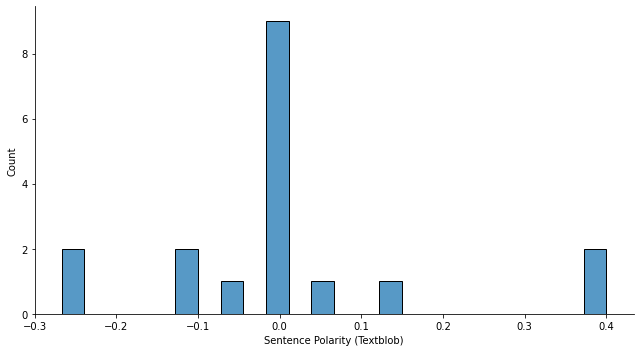

In [217]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

LSTM on textblob 

In [218]:
df_textblob = df_textblob[df_textblob.Sentiment != "Neutral"]
df_textblob['Sentence'] = df_textblob['Sentence'].apply(lambda x: x.lower())
df_textblob['Sentence'] = df_textblob['Sentence'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(df_textblob[ df_textblob['Sentiment'] == 'Positive'].size)
print(df_textblob[ df_textblob['Sentiment'] == 'Negative'].size)

for idx,row in df_textblob.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df_textblob['Sentence'].values)
X = tokenizer.texts_to_sequences(df_textblob['Sentence'].values)
X = pad_sequences(X)
Y = tokenizer.texts_to_sequences(df_textblob['Sentiment'].values)
Y = pad_sequences(Y)

16
20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [219]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 39, 128)           256000    
                                                                 
 spatial_dropout1d_13 (Spati  (None, 39, 128)          0         
 alDropout1D)                                                    
                                                                 
 lstm_13 (LSTM)              (None, 196)               254800    
                                                                 
 dense_13 (Dense)            (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [220]:
Y = pd.get_dummies(df_textblob['Sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6, 39) (6, 2)
(3, 39) (3, 2)


In [221]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Epoch 1/7
1/1 - 4s - loss: 0.6898 - accuracy: 0.8333 - 4s/epoch - 4s/step
Epoch 2/7
1/1 - 0s - loss: 0.6750 - accuracy: 1.0000 - 195ms/epoch - 195ms/step
Epoch 3/7
1/1 - 0s - loss: 0.6673 - accuracy: 1.0000 - 201ms/epoch - 201ms/step
Epoch 4/7
1/1 - 0s - loss: 0.6632 - accuracy: 1.0000 - 204ms/epoch - 204ms/step
Epoch 5/7
1/1 - 0s - loss: 0.6373 - accuracy: 1.0000 - 208ms/epoch - 208ms/step
Epoch 6/7
1/1 - 0s - loss: 0.6248 - accuracy: 1.0000 - 194ms/epoch - 194ms/step
Epoch 7/7
1/1 - 0s - loss: 0.6012 - accuracy: 1.0000 - 241ms/epoch - 241ms/step


In [222]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

1/1 - 0s - loss: 0.6801 - accuracy: 0.6667 - 414ms/epoch - 414ms/step
score: 0.68
acc: 0.67


In [223]:
import numpy as np

In [224]:
new_sentences = ['I feels bad','Happiness is a dream']

In [225]:
seq = tokenizer.texts_to_sequences(new_sentences[0])
padded = pad_sequences(seq)
pred = model.predict(padded)
#print(pred)
print(new_sentences[0])
if(np.argmax(pred) == 0):
    print("negative")
elif (np.argmax(pred) == 1):
    print("positive")

I feels bad
negative


Sentiment Analysis using VADER

In [231]:
import nltk
nltk.download('vader_lexicon')
#takes in a string and returns a dictionary of scores in each polarityfrom 
from nltk.sentiment.vader import SentimentIntensityAnalyzer #takes in a string and returns a dictionary of scores in each polarity

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [237]:
df_textblob

,Sentence,Polarity,Subjectivity,Sentiment
4,register now for free unlimited access to reut...,0.400000,0.800000,Positive
5,thats obviously 100 nonsense even for the stup...,-0.266667,0.522222,Negative
6,they say it happens purely by chance like we d...,-0.049107,0.593750,Negative
10,the uns international atomic energy agency has...,-0.250000,0.250000,Negative
11,kyiv and un secretarygeneral antonio guterres ...,0.062500,0.500000,Positive
12,read more but senior russian lawmaker leonid ...,0.125000,0.208333,Positive
13,and all the statements of the g7 foreign minis...,-0.125000,0.125000,Negative
15,kyiv said the complex had been struck five tim...,-0.100000,0.400000,Negative
17,register now for free unlimited access to reut...,0.400000,0.800000,Positive


In [232]:
textblob_compound=[]
for s in sentence:
  c = sid.polarity_scores(s)
  textblob_compound.append(c)

In [233]:
compound=[]
for value in textblob_compound:
   compound.append(value['compound'])

In [236]:
compound

[-0.872,
 -0.1901,
 -0.4939,
 0.0,
 0.6166,
 -0.5719,
 0.6177,
 0.0,
 0.1695,
 -0.3182,
 -0.25,
 0.0,
 -0.4767,
 0.2144,
 0.0,
 -0.25,
 0.0,
 0.8091]

In [246]:
df['compound'] = compound
df

,Sentence,Polarity,Subjectivity,Sentiment,compound
0,"LONDON, Aug 12 (Reuters) - Russian ex-presiden...",0.000000,0.000000,Neutral,-0.8720
1,Ukraine has accused Russia of firing at Ukrain...,0.000000,0.000000,Neutral,-0.1901
2,It says Moscow has shelled the area itself whi...,0.000000,0.000000,Neutral,-0.4939
3,Russia says it is Ukraine that has shelled the...,0.000000,0.000000,Neutral,0.0000
4,Register now for FREE unlimited access to Reut...,0.400000,0.800000,Positive,0.6166
5,"Thats obviously 100% nonsense, even for the st...",-0.266667,0.522222,Negative,-0.5719
6,"""They say it happens purely by chance, like We...",-0.049107,0.593750,Negative,0.6177
7,"""What can I say?",0.000000,0.000000,Neutral,0.0000
8,Lets not forget that the European Union also h...,0.000000,0.000000,Neutral,0.1695
9,"And accidents can happen there, too.""",0.000000,0.000000,Neutral,-0.3182


In [247]:
newdf = df_textblob.drop("Polarity",axis='columns')
newdf

,Sentence,Subjectivity,Sentiment,compound
0,"LONDON, Aug 12 (Reuters) - Russian ex-presiden...",0.000000,Neutral,-0.8720
1,Ukraine has accused Russia of firing at Ukrain...,0.000000,Neutral,-0.1901
2,It says Moscow has shelled the area itself whi...,0.000000,Neutral,-0.4939
3,Russia says it is Ukraine that has shelled the...,0.000000,Neutral,0.0000
4,Register now for FREE unlimited access to Reut...,0.800000,Positive,0.6166
5,"Thats obviously 100% nonsense, even for the st...",0.522222,Negative,-0.5719
6,"""They say it happens purely by chance, like We...",0.593750,Negative,0.6177
7,"""What can I say?",0.000000,Neutral,0.0000
8,Lets not forget that the European Union also h...,0.000000,Neutral,0.1695
9,"And accidents can happen there, too.""",0.000000,Neutral,-0.3182


In [248]:
newdf = df_textblob.drop("Subjectivity",axis='columns')


In [249]:
newdf = df_textblob.drop("Sentiment",axis='columns')


In [250]:
newdf

,Sentence,Polarity,Subjectivity,compound
0,"LONDON, Aug 12 (Reuters) - Russian ex-presiden...",0.000000,0.000000,-0.8720
1,Ukraine has accused Russia of firing at Ukrain...,0.000000,0.000000,-0.1901
2,It says Moscow has shelled the area itself whi...,0.000000,0.000000,-0.4939
3,Russia says it is Ukraine that has shelled the...,0.000000,0.000000,0.0000
4,Register now for FREE unlimited access to Reut...,0.400000,0.800000,0.6166
5,"Thats obviously 100% nonsense, even for the st...",-0.266667,0.522222,-0.5719
6,"""They say it happens purely by chance, like We...",-0.049107,0.593750,0.6177
7,"""What can I say?",0.000000,0.000000,0.0000
8,Lets not forget that the European Union also h...,0.000000,0.000000,0.1695
9,"And accidents can happen there, too.""",0.000000,0.000000,-0.3182


In [251]:
newdf = newdf.drop("Subjectivity", axis='columns')
newdf

,Sentence,Polarity,compound
0,"LONDON, Aug 12 (Reuters) - Russian ex-presiden...",0.000000,-0.8720
1,Ukraine has accused Russia of firing at Ukrain...,0.000000,-0.1901
2,It says Moscow has shelled the area itself whi...,0.000000,-0.4939
3,Russia says it is Ukraine that has shelled the...,0.000000,0.0000
4,Register now for FREE unlimited access to Reut...,0.400000,0.6166
5,"Thats obviously 100% nonsense, even for the st...",-0.266667,-0.5719
6,"""They say it happens purely by chance, like We...",-0.049107,0.6177
7,"""What can I say?",0.000000,0.0000
8,Lets not forget that the European Union also h...,0.000000,0.1695
9,"And accidents can happen there, too.""",0.000000,-0.3182


In [252]:
newdf = newdf.drop("Polarity", axis='columns')
newdf

,Sentence,compound
0,"LONDON, Aug 12 (Reuters) - Russian ex-presiden...",-0.8720
1,Ukraine has accused Russia of firing at Ukrain...,-0.1901
2,It says Moscow has shelled the area itself whi...,-0.4939
3,Russia says it is Ukraine that has shelled the...,0.0000
4,Register now for FREE unlimited access to Reut...,0.6166
5,"Thats obviously 100% nonsense, even for the st...",-0.5719
6,"""They say it happens purely by chance, like We...",0.6177
7,"""What can I say?",0.0000
8,Lets not forget that the European Union also h...,0.1695
9,"And accidents can happen there, too.""",-0.3182


In [253]:
Class = []
for c in newdf['compound']:
  if c>0:
    c=1
  else:
    c=0;
  Class.append(c)
print(Class)

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]


In [254]:
newdf['Class']=Class
newdf

,Sentence,compound,Class
0,"LONDON, Aug 12 (Reuters) - Russian ex-presiden...",-0.8720,0
1,Ukraine has accused Russia of firing at Ukrain...,-0.1901,0
2,It says Moscow has shelled the area itself whi...,-0.4939,0
3,Russia says it is Ukraine that has shelled the...,0.0000,0
4,Register now for FREE unlimited access to Reut...,0.6166,1
5,"Thats obviously 100% nonsense, even for the st...",-0.5719,0
6,"""They say it happens purely by chance, like We...",0.6177,1
7,"""What can I say?",0.0000,0
8,Lets not forget that the European Union also h...,0.1695,1
9,"And accidents can happen there, too.""",-0.3182,0


LSTM classification

In [255]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from keras.models import Sequential

In [256]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(newdf['Sentence'].values)
X = tokenizer.texts_to_sequences(newdf['Sentence'].values)
X = pad_sequences(X)
word_index = tokenizer.word_index
len(word_index),X.shape

(215, (18, 40))

In [257]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import keras
import keras.utils
from keras import utils as np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [258]:
Y = pd.get_dummies(newdf['Class']).values
Y.shape


(18, 2)

In [259]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(14, 40) (14, 2)
(4, 40) (4, 2)


In [260]:
model = Sequential()
model.add(Embedding(2000, 100, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])#

Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 0.6901 - accuracy: 0.6667

1/1 [==============================] - 4s 4s/step - loss: 0.6901 - accuracy: 0.6667 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 120ms/step - loss: 0.6720 - accuracy: 0.7500 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 116ms/step - loss: 0.6616 - accuracy: 0.7500 - val_loss: 0.7011 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 120ms/step - loss: 0.6406 - accuracy: 0.7500 - val_loss: 0.7068 - val_accuracy: 0.5000


In [261]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1/1 [==============================] - 0s 30ms/step - loss: 0.6781 - accuracy: 0.7500
Test set
  Loss: 0.678
  Accuracy: 0.750


In [262]:
new_sentences = ['I won the game!','I feels bad','my name is keerthy']

In [264]:
seq = tokenizer.texts_to_sequences(new_sentences[1])
padded = pad_sequences(seq)
pred = model.predict(padded)
#print(pred)
print(new_sentences[1])
if(np.argmax(pred) == 0):
    print("negative")
elif (np.argmax(pred) == 1):
    print("positive")

I feels bad
negative
